In [81]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
from matplotlib.ticker import MultipleLocator

font_list = font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

font = {"family": "Noto Sans", "weight": "normal", "size": 12}
plt.rc("font", **font)

In [82]:
df = pd.read_csv("input/data.csv")

/tmp/ipykernel_36655/1784962907.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(y_labels, size=20)
/tmp/ipykernel_36655/1784962907.py:65: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, size=20, fontweight="bold")


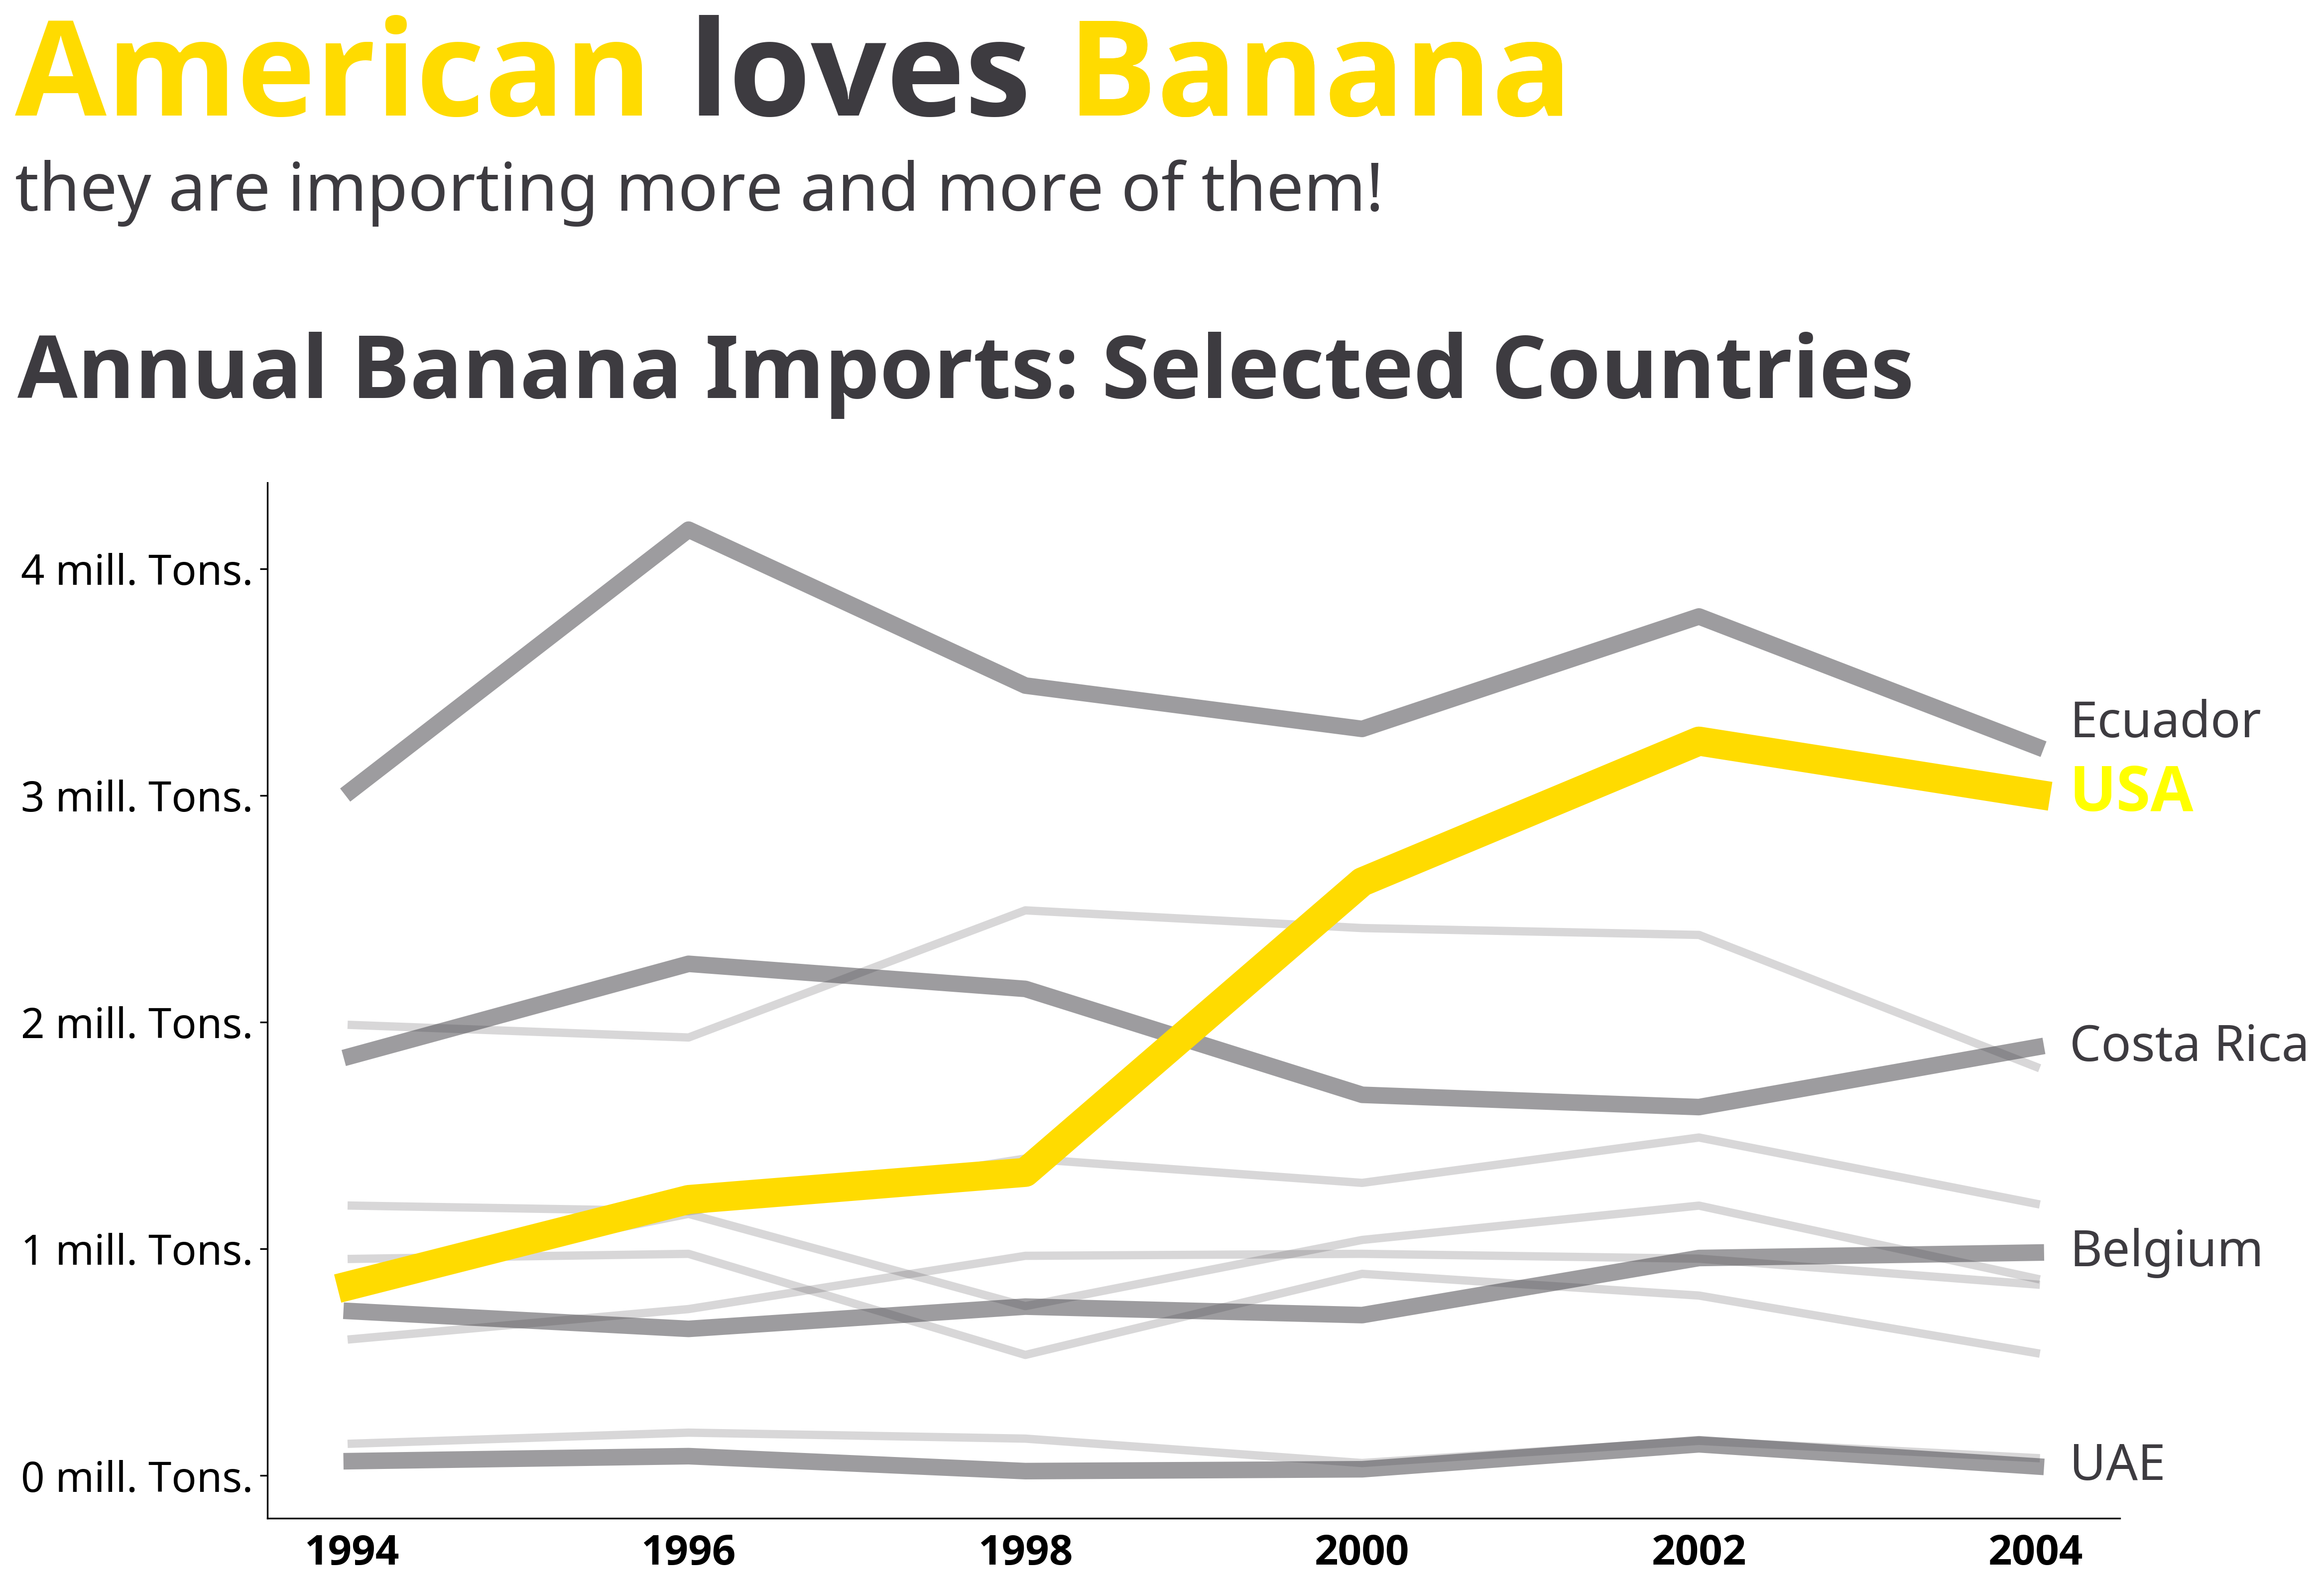

In [96]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)

yellow = "#ffdb00"
grey = "#3D3B40"
country_of_focus = "USA"
country_to_label = [
    "Ecuador",
    "Costa Rica",
    "Columbia",
    "United Arab Emirates",
    "Belgium",
]

for country in list(df["country"].unique()):
    data = df.loc[df["country"] == country]

    color = yellow if country == country_of_focus else grey

    zorder = 10 if country == country_of_focus else 0

    if country == country_of_focus:
        linewidth = 14
        alpha = 1.0
    elif country in country_to_label:
        linewidth = 8
        alpha = 0.5
    else:
        linewidth = 4
        alpha = 0.2

    ax.plot(
        data["year"],
        data["value"],
        color=color,
        linewidth=linewidth,
        alpha=alpha,
        zorder=zorder,
    )

    y = data.loc[data["year"] == 2004, "value"].values[0]
    if country == "Ecuador":
        y = y + 100_000
    x = 2004.2
    color = "yellow" if country == country_of_focus else grey
    weight = "bold" if country == country_of_focus else "normal"
    size = 30 if country == country_of_focus else 24
    if country == country_of_focus or country in country_to_label:
        if country == "United Arab Emirates":
            country = "UAE"
        ax.text(
            x=x,
            y=y,
            s=country,
            ha="left",
            va="center",
            fontsize=size,
            color=color,
            fontweight=weight,
        )

ax.yaxis.set_major_locator(MultipleLocator(base=1e6))
y_labels = [f"{x:,.0f} mill. Tons." for x in ax.get_yticks() / 1000_000]
ax.set_yticklabels(y_labels, size=20)
x_labels = ["{:.0f}".format(x) for x in ax.get_xticks()]
ax.set_xticklabels(x_labels, size=20, fontweight="bold")

ax.spines[["top", "right"]].set_visible(False)
ax.tick_params(bottom=False)

y_pos = 6_000_000
x_pos = 1992
fontsize = 64

text1 = "American"
ax.text(
    x=(x_pos), y=(y_pos), s=text1, fontsize=fontsize, fontweight="bold", color=yellow
)
text2 = "loves"
ax.text(
    x=(x_pos + 4.0),
    y=(y_pos),
    s=text2,
    fontsize=fontsize,
    fontweight="bold",
    color=grey,
)
text3 = "Banana"
ax.text(
    x=(x_pos + 6.25),
    y=(y_pos),
    s=text3,
    fontsize=fontsize,
    fontweight="bold",
    color=yellow,
)
ax.text(
    x=(x_pos + 6.25),
    y=(y_pos),
    s=text3,
    fontsize=fontsize,
    fontweight="bold",
    color=yellow,
)
text4 = "they are importing more and more of them!"
ax.text(x=(x_pos), y=(y_pos - 420_000), s=text4, fontsize=32, color=grey)

plt.title(
    "Annual Banana Imports: Selected Countries",
    fontsize=42,
    horizontalalignment="left",
    x=-0.135,
    y=1.07,
    fontweight="bold",
    color=grey,
)

plt.show()